HW1 Q3. Linear Regression for Bitcoin/Ethereum Price
=============

### (a) Develop a linear regression model to predict Ethereum price. Print the last 10 values of {step, cost, W, b}

In [1]:
# import packages
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

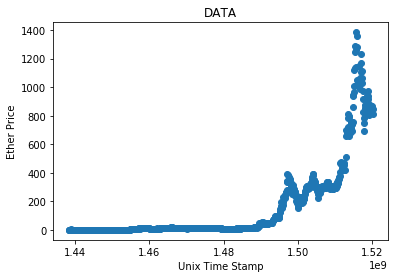

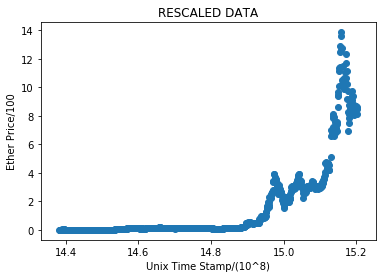

In [2]:
# load data
file_path = os.path.join('hw1data/bitcoin', 'export-EtherPrice.csv')
load_data = pd.read_csv(file_path, sep=',')
dataset = load_data.values[:, 1:]

plt.scatter(dataset[:,0], dataset[:,1])
plt.title('DATA')
plt.xlabel('Unix Time Stamp')
plt.ylabel('Ether Price')
plt.show()

x_train = dataset[:, 0]
y_train = dataset[:, 1]

# too big numbers to put it in float64
# need to be rescaled
x_train = x_train/100000000.0
y_train = y_train/100.0

plt.scatter(x_train, y_train)
plt.title('RESCALED DATA')
plt.xlabel('Unix Time Stamp/(10^8)')
plt.ylabel('Ether Price/100')
plt.show()

In [3]:
learning_rate = 15**(-2)
epochs = 8000001
#epochs = 500000
g1 = tf.Graph()
with g1.as_default():
    X = tf.placeholder(tf.float64, shape = [None])
    Y = tf.placeholder(tf.float64, shape = [None])
    
    W = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='weight')
    b = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='bias')

    hypothesis = tf.add(tf.multiply(X, W), b)

    cost = tf.reduce_mean(tf.square(tf.subtract(hypothesis, Y)))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train = optimizer.minimize(cost)

with tf.Session(graph=g1) as sess:
    print("step | cost | W | b")
    sess.run(tf.global_variables_initializer())

    for step in range(epochs):
        cost_val, W_val, b_val, _ = \
            sess.run([cost, W, b, train],
                     feed_dict={X: x_train, Y: y_train})
        if step > (epochs-11):
        #if step % 50000 == 0:
            print(step, cost_val, W_val, b_val)
   
    predict_price = sess.run(hypothesis, feed_dict={X: [(1520294400+13.0*86400.0)/(10.0**8.0)], Y: [1]})

step | cost | W | b
7999991 3.4177773855676197 [8.42342213] [-123.04942481]
7999992 3.4177773855676192 [8.42342213] [-123.04942481]
7999993 3.4177773855676192 [8.42342213] [-123.04942481]
7999994 3.4177773855676197 [8.42342213] [-123.04942481]
7999995 3.417777385567621 [8.42342213] [-123.04942481]
7999996 3.41777738556762 [8.42342213] [-123.04942481]
7999997 3.417777385567621 [8.42342213] [-123.04942481]
7999998 3.4177773855676192 [8.42342213] [-123.04942481]
7999999 3.41777738556762 [8.42342213] [-123.04942481]
8000000 3.417777385567621 [8.42342213] [-123.04942481]


### (b) Predict the price on March 19th?

In [4]:
print("The Ether Price on March 19th : ", predict_price*100.0)

The Ether Price on March 19th :  [510.60020448]


### Use transaction growth "export-TxGrowth.csv" as a feature to predict the Ethereum price.
### (c) Develop a linear regression model and print the last 10 values of {step, cost, W, b}.

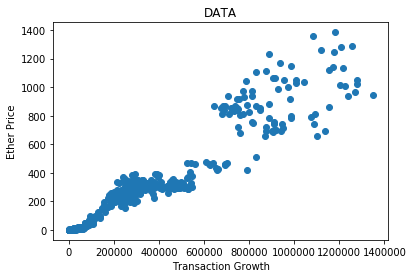

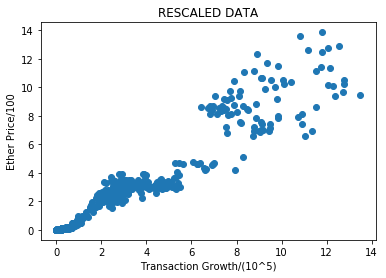

In [5]:
# load data
file_path = os.path.join('hw1data/bitcoin', 'export-TxGrowth.csv')
load_data = pd.read_csv(file_path, sep=',')
tx_growth = load_data.values[:, 2]
#print(tx_growth)

plt.scatter(tx_growth, y_train*100.0)
plt.title('DATA')
plt.xlabel('Transaction Growth')
plt.ylabel('Ether Price')
plt.show()

tx_growth = tx_growth/100000.0

plt.scatter(tx_growth, y_train)
plt.title('RESCALED DATA')
plt.xlabel('Transaction Growth/(10^5)')
plt.ylabel('Ether Price/100')
plt.show()

In [6]:
learning_rate = 10**(-3)
epochs = 25001

g2 = tf.Graph()
with g2.as_default():
    X = tf.placeholder(tf.float64, shape = [None])
    Y = tf.placeholder(tf.float64, shape = [None])
    
    W = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='weight')
    b = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='bias')

    hypothesis = tf.add(tf.multiply(X, W), b)

    cost = tf.reduce_mean(tf.square(tf.subtract(hypothesis, Y)))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train = optimizer.minimize(cost)

with tf.Session(graph=g2) as sess:
    print("step | cost | W | b")
    sess.run(tf.global_variables_initializer())

    for step in range(epochs):
        cost_val, W_val, b_val, _ = \
            sess.run([cost, W, b, train],
                     feed_dict={X: tx_growth, Y: y_train})
        if step > (epochs-11):
        #if step % 5000 == 0:
            print(step, cost_val, W_val, b_val)

step | cost | W | b
24991 0.509867178494975 [0.94034854] [-0.19450488]
24992 0.509867178494975 [0.94034854] [-0.19450488]
24993 0.509867178494975 [0.94034854] [-0.19450488]
24994 0.509867178494975 [0.94034854] [-0.19450488]
24995 0.509867178494975 [0.94034854] [-0.19450488]
24996 0.509867178494975 [0.94034854] [-0.19450488]
24997 0.509867178494975 [0.94034854] [-0.19450488]
24998 0.509867178494975 [0.94034854] [-0.19450488]
24999 0.509867178494975 [0.94034854] [-0.19450488]
25000 0.509867178494975 [0.94034854] [-0.19450488]


### (e) Any correlations between transaction growth and price?

According to the plots, the price proportionally increases as the transaction growth increases even though high values of the transation growth are scattered. 
### Now, use price to predict the transaction growth.
### (f) Develop a linear regression model and print the last 10 values of {step, cost, W, b}

In [7]:
learning_rate = 10**(-3)
epochs = 25001

g3 = tf.Graph()
with g3.as_default():
    X = tf.placeholder(tf.float64, shape = [None])
    Y = tf.placeholder(tf.float64, shape = [None])
    
    W = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='weight')
    b = tf.Variable(tf.random_normal([1], dtype=tf.float64), name='bias')

    hypothesis = tf.add(tf.multiply(X, W), b)

    cost = tf.reduce_mean(tf.square(tf.subtract(hypothesis, Y)))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train = optimizer.minimize(cost)

with tf.Session(graph=g3) as sess:
    print("step | cost | W | b")
    sess.run(tf.global_variables_initializer())

    for step in range(epochs):
        cost_val, W_val, b_val, _ = \
            sess.run([cost, W, b, train],
                     feed_dict={X: y_train, Y: tx_growth})
        if step > (epochs-11):
        #if step % 5000 == 0:
            print(step, cost_val, W_val, b_val)

step | cost | W | b
24991 0.536861598587961 [0.99013438] [0.32012889]
24992 0.536861598587961 [0.99013438] [0.32012889]
24993 0.536861598587961 [0.99013438] [0.32012889]
24994 0.536861598587961 [0.99013438] [0.32012889]
24995 0.536861598587961 [0.99013438] [0.32012889]
24996 0.536861598587961 [0.99013438] [0.32012889]
24997 0.536861598587961 [0.99013438] [0.32012889]
24998 0.536861598587961 [0.99013438] [0.32012889]
24999 0.536861598587961 [0.99013438] [0.32012889]
25000 0.536861598587961 [0.99013438] [0.32012889]
